In [22]:
from matplotlib import pyplot as plt
import random

def perform_show(): #Execute the simulation of 1 Monty Hall Problem (MHP)

    winning_door = random.randint(0,2) #Generate the winning door, from 0 to 2
    players_choice = [random.randint(0, 2) for n in range(3)] #Generate the choice of each player. Player 2 will be overwritten

    #Player 0: Conservative
    #Player 1: Switcher
    #Player 2: Newcomer

    opened_door = random.randint(0,2) #Generate the opened door

    while (opened_door == players_choice[0]) or (opened_door == winning_door): #Prevent the opened door to be the winning door or the one chosen by the conservative player (player 0)
        opened_door = random.randint(0,2)

    players_choice[2] = random.randint(0,2) #Newcomer (player 2) makes his choice
    while (players_choice[2] == opened_door): #But obviously he doesn't choose the opened door
        players_choice[2] = random.randint(0,2)

    switcher_first_choice = players_choice[1]

    while (players_choice[1] == switcher_first_choice) or (players_choice[1] == opened_door): #Switcher (player 1) switches door
        players_choice[1] = random.randint(0,2)

    winners = [] #Boolean array where we store the winners of the simulation

    for i in range(len(players_choice)):
        if (players_choice[i] == winning_door):
            winners.append(True)
        else:
            winners.append(False)

    return winners #[Bool, Bool, Bool]


In [23]:
players_win_count = [0, 0, 0] #Count of the wins of every type of player: "Conservative", "Switcher", "Newcomer"
winners = [] #This will store the outcome of every simulation [[Bool, Bool, Bool], [Bool, Bool, Bool], [Bool, Bool, Bool], ...]
triple_victory_count = 0

simulations_number = 3419

for i in range(simulations_number):
    winners.append(perform_show()) #Store the result of every simulation
    for j in range(len(winners[i])):
        if (winners[i][j] == True): #Count the wins of every type of player
            players_win_count[j] += 1
    if (winners[i] == [True, True, True]): #Count the triple victory events
            triple_victory_count += 1

print("Victories of every type of player: " + str(players_win_count)) #Prints the number of wins of every type of player: "Conservative", "Switcher", "Newcomer"
print("Triple Victories: " + str(triple_victory_count)) #Prints how many triple wins occours

Victories of every type of player: [1168, 1711, 1669]
Triple Victories: 261


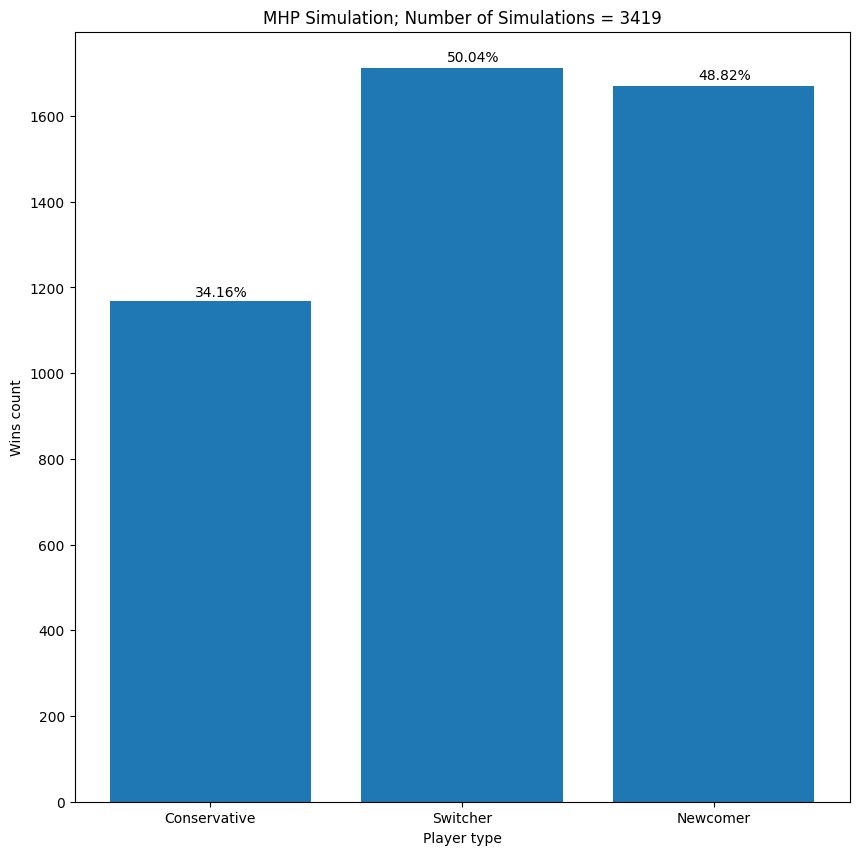

In [24]:
players_bins = ["Conservative", "Switcher", "Newcomer"]
fig, ax = plt.subplots(figsize =(10, 10))
ax.bar(players_bins, players_win_count)
ax.set_title("MHP Simulation; Number of Simulations = " + str(simulations_number))
ax.set_xlabel("Player type")
ax.set_ylabel("Wins count")
for i in ax.patches: #Adding labels for probabilities
    text = str(round((i.get_height()/simulations_number)*100, 2)) + "%"
    plt.text(i.get_x()+i.get_width()/2*(1-2/13), i.get_height()*(1+0.01), text) #Label positioning

plt.show()
